# Exploratory data analysis

In this notebook we will explore and visualize trends, patterns and distributions in the cleaned OMDb dataset.

* more to be there *

## 1. Setup and Data Overview


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

notebook_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(notebook_dir, ".."))

# now point to the cleaned CSV
data_path = os.path.join(
    project_root,
    "data_collection",
    "omdb_cleaned.csv"
)

print("Reading from:", data_path)
df = pd.read_csv(data_path)
df.info()

Reading from: c:\PythonProjects\Movie-Team\data_collection\omdb_cleaned.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4768 entries, 0 to 4767
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       4768 non-null   object 
 1   imdbID      4768 non-null   object 
 2   Year        4768 non-null   object 
 3   Genre       4761 non-null   object 
 4   Director    4642 non-null   object 
 5   Actors      4723 non-null   object 
 6   Language    4722 non-null   object 
 7   Country     4758 non-null   object 
 8   Runtime     4710 non-null   object 
 9   BoxOffice   2849 non-null   float64
 10  imdbRating  4710 non-null   float64
 11  imdbVotes   4726 non-null   float64
 12  Awards      3583 non-null   object 
 13  Type        4768 non-null   object 
 14  budget      4466 non-null   float64
dtypes: float64(4), object(11)
memory usage: 558.9+ KB


feauture description + types

## 2. Missing Values

text

### 2.1 Missing values heatmap

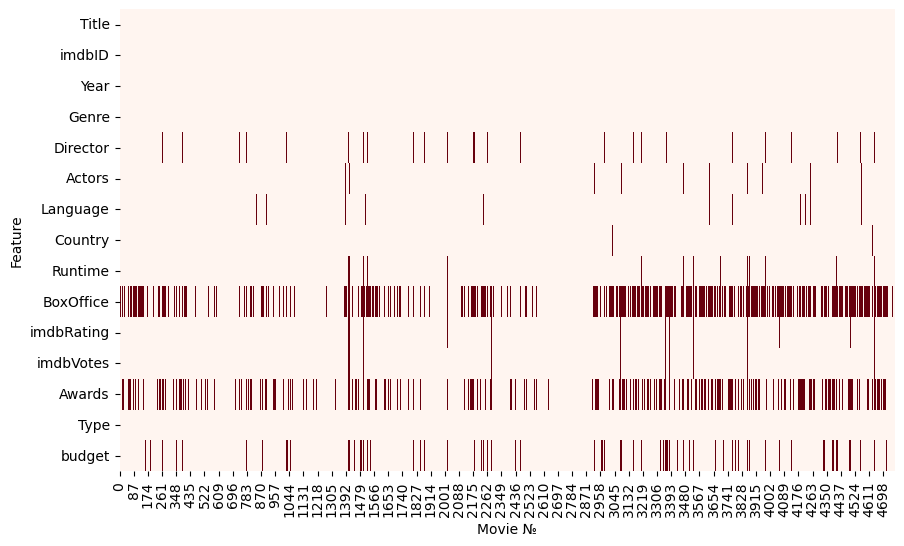

In [19]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna().T, cbar=False, cmap="Reds", yticklabels=True)

plt.xlabel("Movie №")
plt.ylabel("Feature")
plt.show()

### 2.2 Missing values table

In [20]:
missing_summary = df.isna().sum().reset_index()
missing_summary.columns = ['Feature', 'Missing Count']
missing_summary["% Missing"] = (missing_summary["Missing Count"] / len(df)) * 100
missing_summary = missing_summary[missing_summary["Missing Count"] > 0]
missing_summary.sort_values(by="Missing Count", ascending=False)

,Feature,Missing Count,% Missing
9,BoxOffice,1919,40.247483
12,Awards,1185,24.853188
14,budget,302,6.333893
4,Director,126,2.642617
8,Runtime,58,1.216443
10,imdbRating,58,1.216443
6,Language,46,0.964765
5,Actors,45,0.943792
11,imdbVotes,42,0.880872
7,Country,10,0.209732


### 2.3 The Boxplot: IMDb rating vs missing box of

Here we want to briefly find out whether the absence of box office data is related to movie popularity. We compared IMDb ratings for movies with and without BoxOffice values.

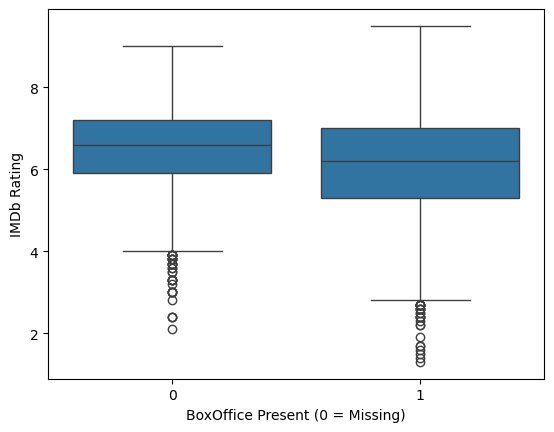

In [21]:
df["missing_boxoffice"] = df["BoxOffice"].isna().astype(int)

sns.boxplot(x="missing_boxoffice", y="imdbRating", data=df)
plt.xlabel("BoxOffice Present (0 = Missing)")
plt.ylabel("IMDb Rating")
plt.show()

There is no significant difference between the two groups which suggests that missing Box Office fields are not strongly biased by rating.

## 3. Feature Exploration





### 3.1 Ratings & Votes

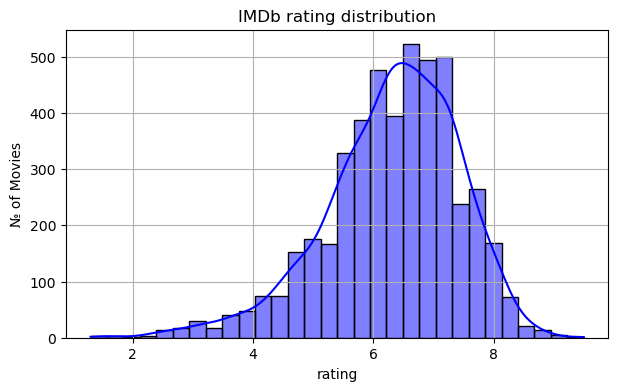

In [22]:
plt.figure(figsize=(7, 4))
sns.histplot(df["imdbRating"].dropna(), bins=30, kde=True, color="blue")
plt.title("IMDb rating distribution")
plt.xlabel("rating")
plt.ylabel("№ of Movies")
plt.grid(True)
plt.show()

### 3.2 Runtime Distribution

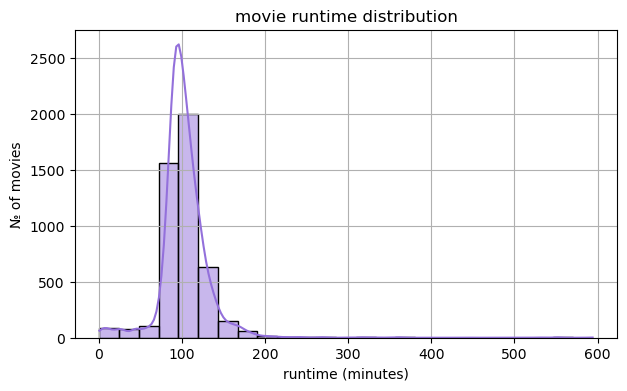

In [23]:
#convert string "runtime" to float type
df["Runtime_clean"] = df["Runtime"].str.extract(r'(\d+)').astype(float)
plt.figure(figsize=(7, 4))
sns.histplot(df["Runtime_clean"].dropna(), bins=25, kde=True, color="mediumpurple")
plt.title("movie runtime distribution")
plt.xlabel("runtime (minutes)")
plt.ylabel("№ of movies")
plt.grid(True)
plt.show()

### 3.3 Genre Frequency

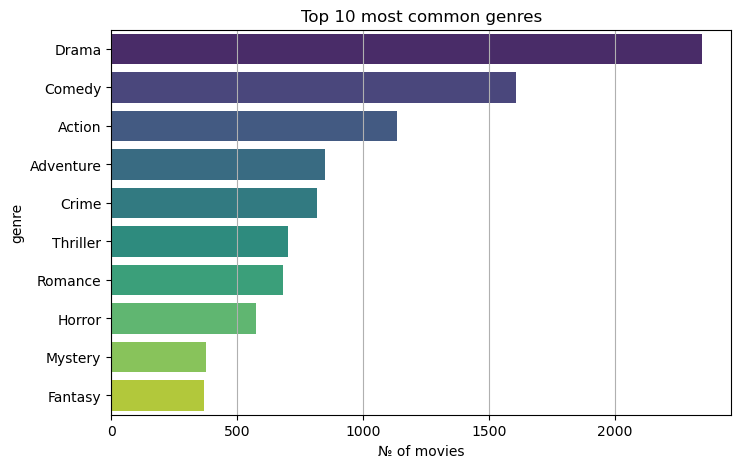

In [24]:
# to count how often each genre appears in the list
from collections import Counter

all_genres = []

for genre_string in df["Genre"].dropna():
    split_genres = genre_string.split(", ")
    all_genres.extend(split_genres)

from collections import Counter
genre_counts = pd.DataFrame(Counter(all_genres).most_common(10), columns=["Genre", "Count"])

plt.figure(figsize=(8, 5))
sns.barplot(data=genre_counts, y="Genre", x="Count", hue="Genre", palette="viridis", dodge=False, legend=False)
plt.title("Top 10 most common genres")
plt.xlabel("№ of movies")
plt.ylabel("genre")
plt.grid(True, axis='x')
plt.show()

### 3.4 Country / Language

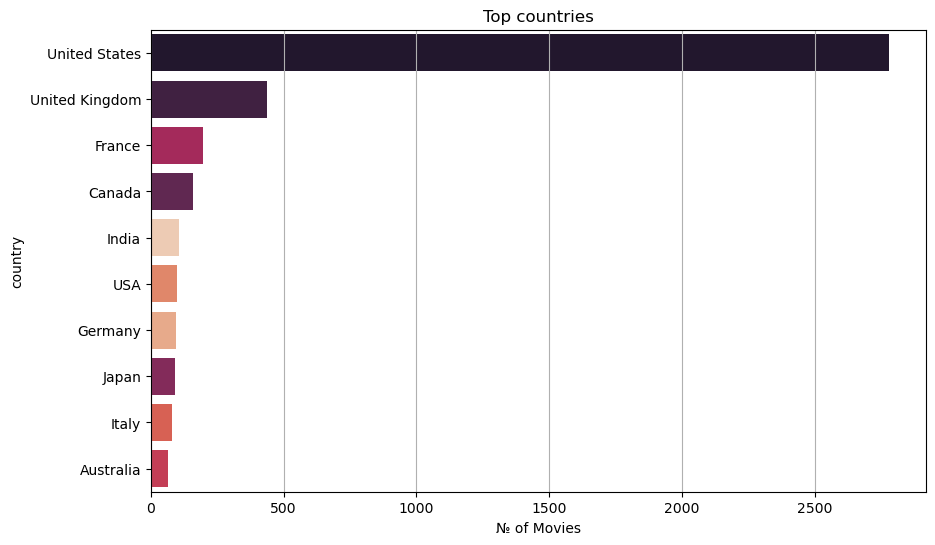

In [25]:
df["Main_Country"] = df["Country"].dropna().apply(lambda x: x.split(",")[0])

plt.figure(figsize=(10, 6))
order = df["Main_Country"].value_counts().head(10).index

sns.countplot(
    data=df[df["Main_Country"].isin(order)],
    y="Main_Country",
    order=order,
    hue="Main_Country",        
    palette="rocket",
    dodge=False,
    legend=False            
)

plt.title("Top сountries")
plt.xlabel("№ of Movies")
plt.ylabel("сountry")
plt.grid(True, axis='x')
plt.show()

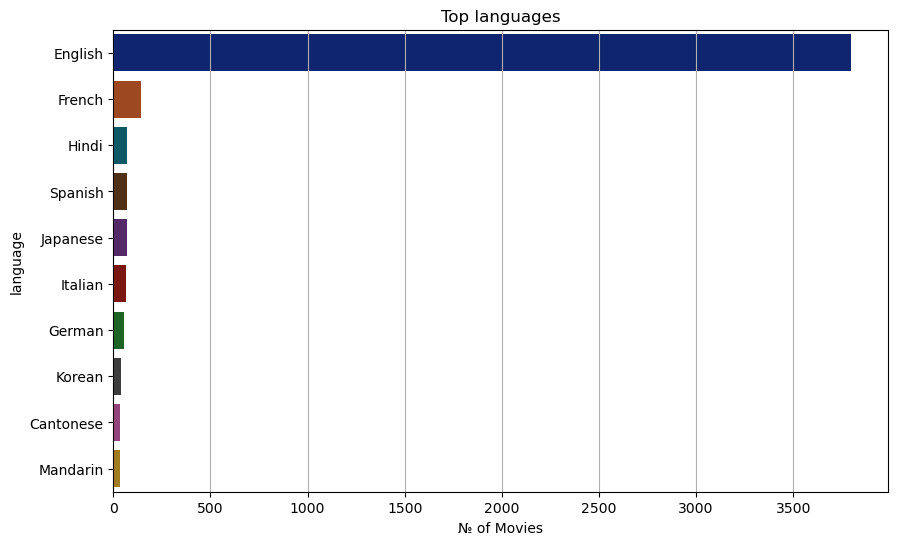

In [26]:
df["Main_Language"] = df["Language"].dropna().apply(lambda x: x.split(",")[0])

# top 10 most frequent
top_languages = df["Main_Language"].value_counts().head(10).index

plt.figure(figsize=(10, 6))
sns.countplot(
    data=df[df["Main_Language"].isin(top_languages)],
    y="Main_Language",
    order=top_languages,
    hue="Main_Language",        
    palette="dark",         
    dodge=False,
    legend=False
)

plt.title("Top languages")
plt.xlabel("№ of Movies")
plt.ylabel("language")
plt.grid(True, axis='x')
plt.show()

### 3.5 Revenue (BoxOffice) Distribution

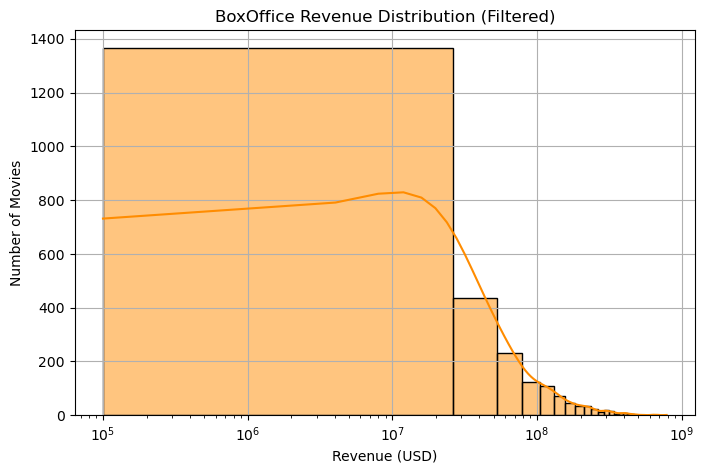

In [27]:
filtered_df = df[df["BoxOffice"] > 100_000]

plt.figure(figsize=(8, 5))
sns.histplot(filtered_df["BoxOffice"], bins=30, kde=True, color="darkorange")
plt.xscale("log")
plt.title("BoxOffice Revenue Distribution (Filtered)")
plt.xlabel("Revenue (USD)")
plt.ylabel("Number of Movies")
plt.grid(True)
plt.show()

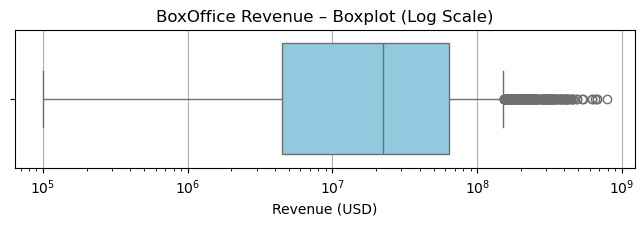

In [28]:
plt.figure(figsize=(8, 1.8))
sns.boxplot(x=filtered_df["BoxOffice"], color="skyblue")
plt.xscale("log")
plt.title("BoxOffice Revenue – Boxplot (Log Scale)")
plt.xlabel("Revenue (USD)")
plt.grid(True, axis='x')
plt.show()


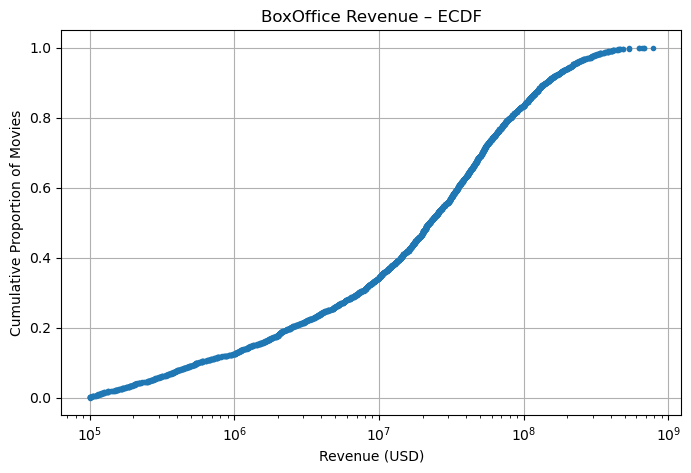

In [29]:
bo = filtered_df['BoxOffice'].dropna()
bo = bo[bo > 0]
x = np.sort(bo)
y = np.arange(1, len(x) + 1) / len(x)

plt.figure(figsize=(8, 5))
plt.plot(x, y, marker='.', linestyle='none')
plt.xscale("log")
plt.title("BoxOffice Revenue – ECDF")
plt.xlabel("Revenue (USD)")
plt.ylabel("Cumulative Proportion of Movies")
plt.grid(True)
plt.show()


###  BoxOffice Revenue Distribution – Multi-View Analysis

To better understand the distribution of movie revenues, we used three complementary visualizations: a **histogram**, a **boxplot**, and an **ECDF plot**. Each offers a unique perspective on the data.

---

####  1. Histogram with KDE (Filtered)

This histogram shows the distribution of BoxOffice revenue after filtering out movies with less than $100,000. The log scale helps visualize the long-tailed nature of the data. The peak around **$10M–$50M** suggests that this is the typical earnings range for most films, while a long tail toward the right captures high-earning blockbusters.

---

####  2. Box Plot (Log Scale)

The box plot summarizes the spread and outliers in the revenue data. The **interquartile range (IQR)** lies roughly between **$5M and $100M**, indicating that 50% of movies earn within this range. The numerous dots on the right represent outliers — highly successful movies earning up to or over **$1B**, which significantly skew the distribution.

---

####  3. ECDF Plot

The ECDF (Empirical Cumulative Distribution Function) plot helps answer questions like:  
> "What percentage of movies earned less than a certain amount?"

From the curve, we observe that:
- ~50% of movies earned below **$20–30 million**
- ~90% earned below **$150–200 million**
- Only a tiny fraction reached revenues beyond **$500 million**

This confirms the extreme right-skew in the data and reinforces the need for log transformations or outlier handling in modeling.

---

###  Summary Insight

The combination of these three plots clearly shows that movie revenue follows a **highly skewed distribution**:
- Most movies earn modest amounts,
- A few earn extremely high figures,
- Revenue should be log-transformed or scaled appropriately for machine learning models.


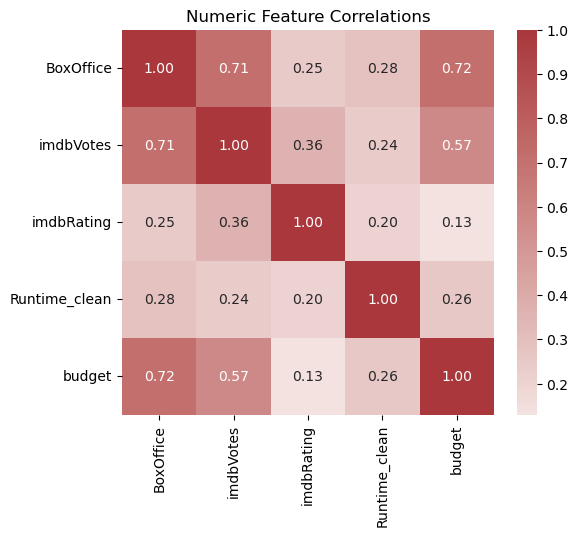

In [30]:
num_cols = ['BoxOffice','imdbVotes','imdbRating','Runtime_clean','budget']  # add budget if you’ve merged it
corr = df[num_cols].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="vlag", center=0)
plt.title("Numeric Feature Correlations")
plt.show()


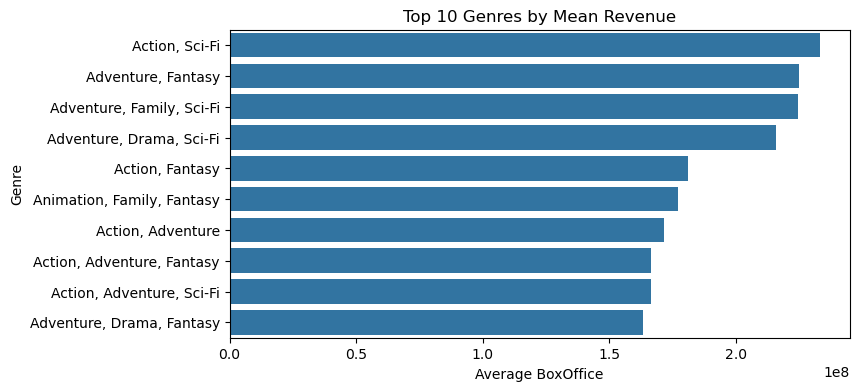

In [31]:
# average BoxOffice (or log_BoxOffice) by genre
exploded = df.assign(Genre=df['Genre'].str.split('|')).explode('Genre')
means = exploded.groupby('Genre')['BoxOffice'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=means.values, y=means.index)
plt.xlabel("Average BoxOffice")
plt.title("Top 10 Genres by Mean Revenue")
plt.show()

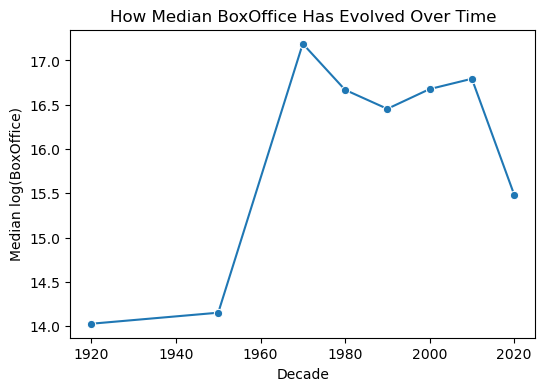

In [ ]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce').astype('Int64')
df = df.dropna(subset=['Year'])       # drop any non-numeric Years
df['Decade'] = (df['Year'] // 10) * 10

df['Decade'] = (df['Year']//10)*10
dec_means = df.groupby('Decade')['BoxOffice'].median()
plt.figure(figsize=(6,4))
sns.lineplot(x=dec_means.index, y=np.log1p(dec_means.values), marker='o')
plt.xlabel("Decade")
plt.ylabel("Median log(BoxOffice)")
plt.title("How Median BoxOffice Has Evolved Over Time")
plt.show()